In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD, IncrementalPCA
from sklearn.manifold import TSNE
import umap
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import pickle
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import random
import optuna
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2026-02-21 17:18:36.851249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771694317.122347      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771694317.206959      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771694317.864157      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771694317.864215      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771694317.864218      55 computation_placer.cc:177] computation placer alr

In [4]:
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
train = pd.read_parquet('/kaggle/input/datasets/kirillpale228777/datafusionligalasosa/train_main_features (1).parquet')
target = pd.read_parquet('/kaggle/input/datasets/kirillpale228777/datafusionligalasosa/train_target.parquet')
# train_extra_features = pd.read_parquet('/kaggle/input/datasets/kirillpale228777/datafusionligalasosa/train_extra_features.parquet')
test_main_features = pd.read_parquet('/kaggle/input/datasets/kirillpale228777/datafusionligalasosa/test_main_features.parquet')
# test_extra_features = pd.read_parquet('/kaggle/input/datasets/kirillpale228777/datafusionligalasosa/test_extra_features.parquet')
sample_submit = pd.read_parquet('/kaggle/input/datasets/kirillpale228777/datafusionligalasosa/sample_submit.parquet')


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


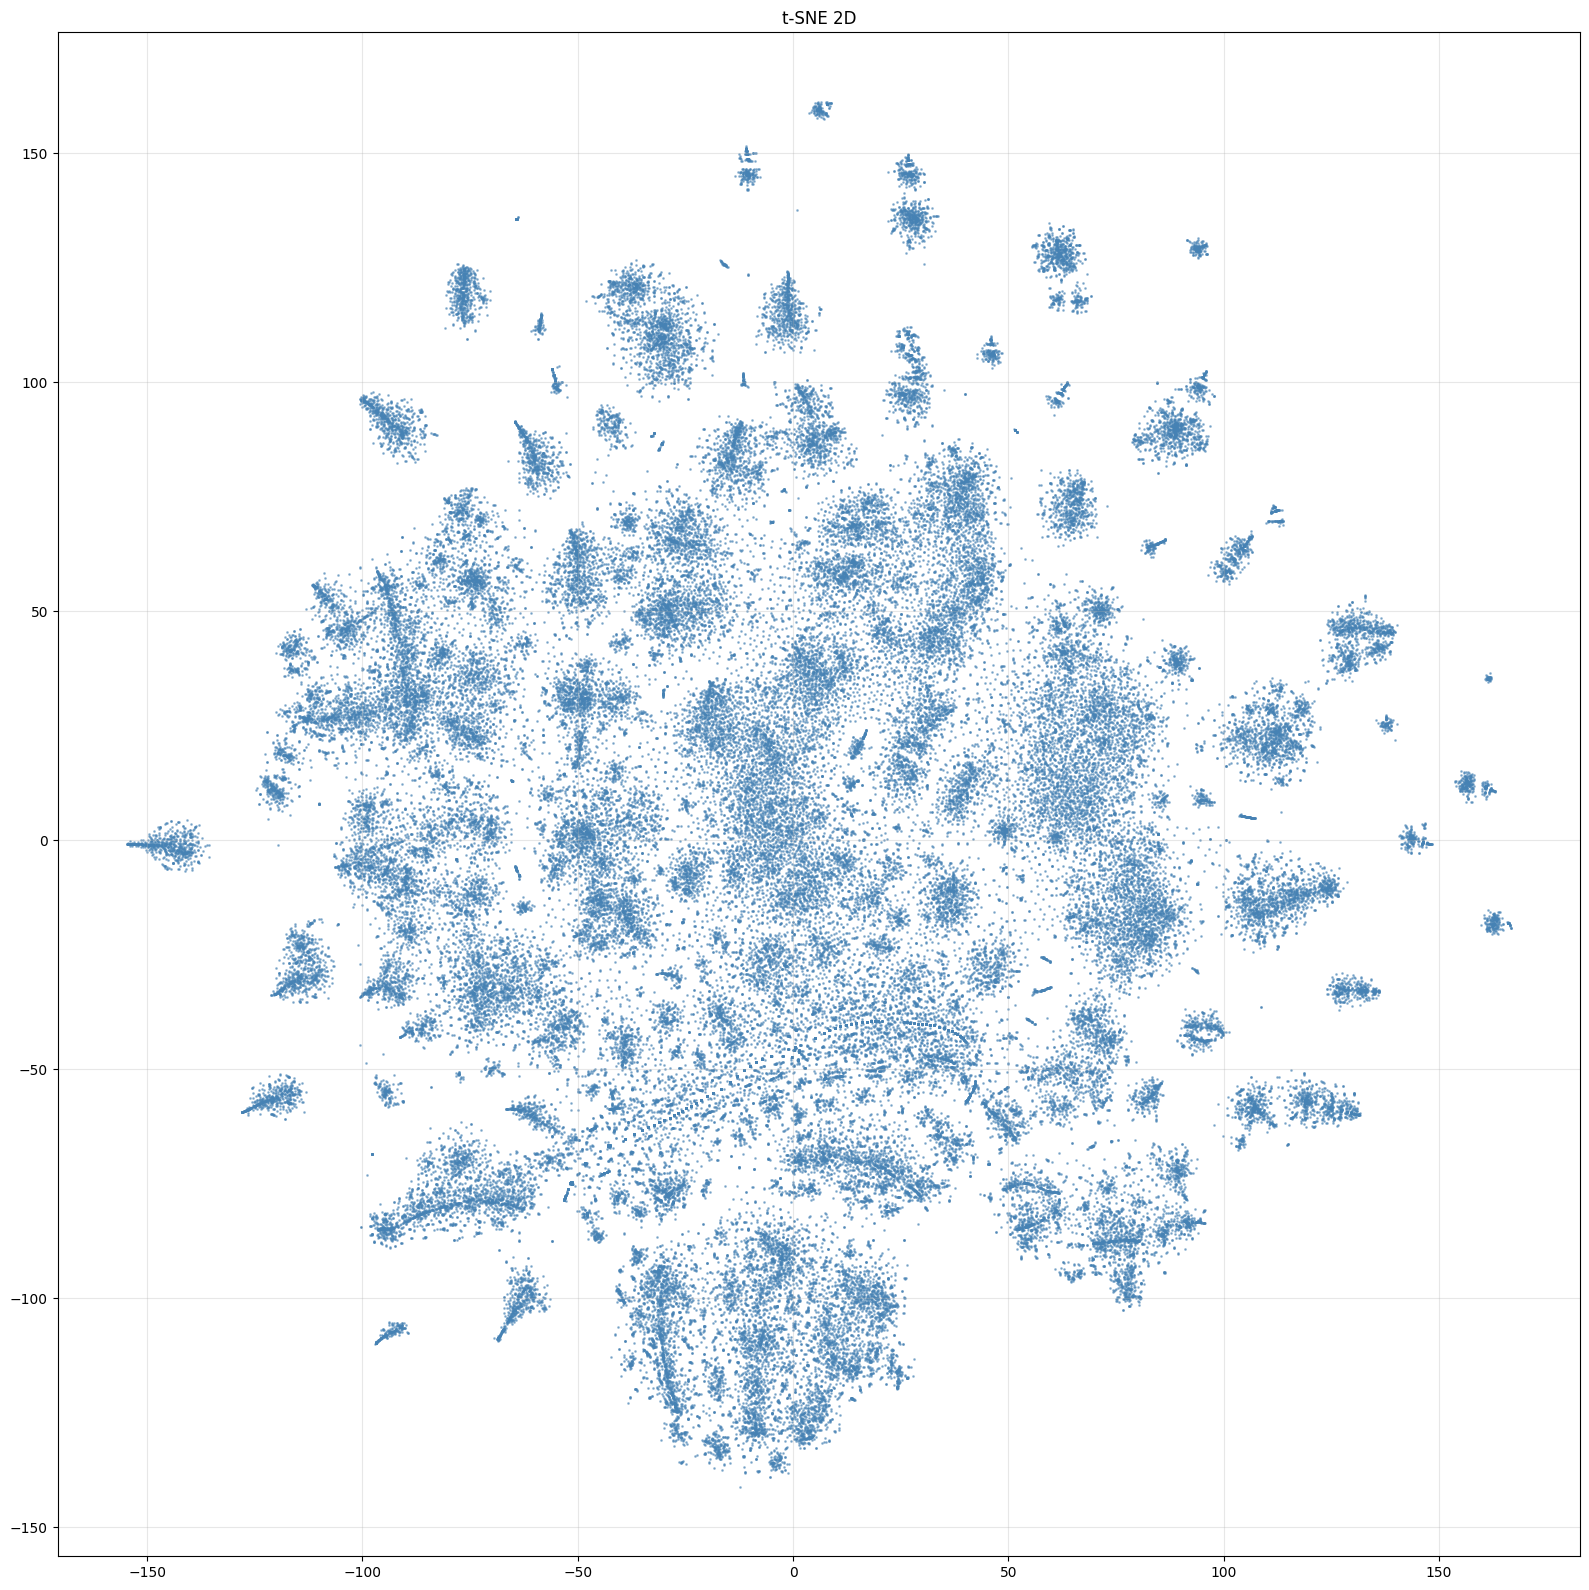

In [5]:
random_samples = random.sample(range(len(train) - 1), 100000)

df = train.iloc[random_samples, :]

cat_cols = list(df.columns[0:68])      # категориальные (0-67)
num_cols = list(df.columns[68:200])    # числовые (68-200)

# 2. Обработка пропусков
for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])
for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

# t-SNE для 2D
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=100, n_iter=3000)
X_tsne_2d = tsne_2d.fit_transform(df_scaled)


# Визуализация
fig, ax1 = plt.subplots(1, 1, figsize=(16, 16))

# 2D график
scatter1 = ax1.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], s=1, alpha=0.5, c='steelblue')
ax1.set_title('t-SNE 2D')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

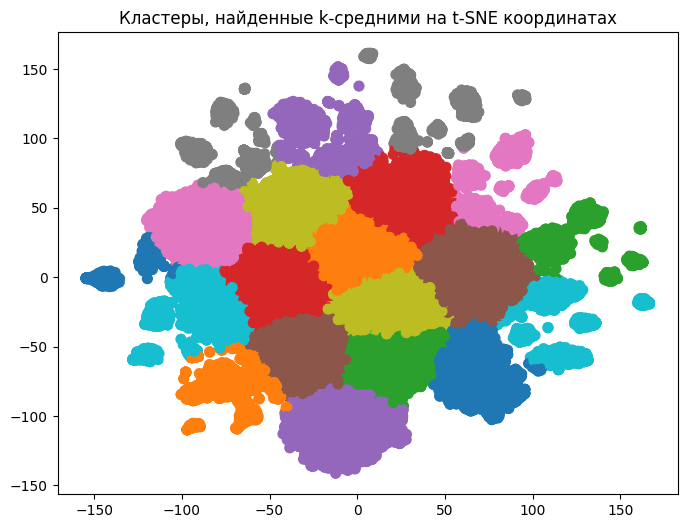

In [6]:
kmeans = KMeans(n_clusters=20, random_state=52)
labels_tsne = kmeans.fit_predict(X_tsne_2d)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=labels_tsne, cmap='tab10', s=50)
plt.title("Кластеры, найденные k-средними на t-SNE координатах")
plt.show()

In [7]:
labels_tsne

array([14, 13,  5, ...,  3,  9,  9], dtype=int32)